In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout


## Loading Image Data and store them into list and converting to numpy arrays for feeding in the model

In [2]:


data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
print("Shape of Data",data.shape)
print("Shape of Label",labels.shape)

Shape of Data (39209, 30, 30, 3)
Shape of Label (39209,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data ,labels,test_size =0.2,random_state=42)


print("Train Data",X_train.shape)
print("Test Data",X_test.shape)

Train Data (31367, 30, 30, 3)
Test Data (7842, 30, 30, 3)


In [5]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

Dropout is used after Convolution and Pooling. Flattening is converting the data into 1-dimensional array for inputing it to the next layer. Flatten the output of the convolution layers to create a single long feature vector. And it is connected to the final classification model, whoch is called a fully connected layer.


In [6]:

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape= X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))

model.add(Dropout(rate =0.5))
model.add(Dense(43, activation="softmax"))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [7]:
epochs = 15
history = model.fit(X_train,y_train,epochs=epochs,batch_size=64, validation_data=(X_test,y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 80s 3ms/step - loss: 2.1267 - accuracy: 0.4644 - val_loss: 0.6530 - val_accuracy: 0.8377
Epoch 2/15
31367/31367 [==============================] - 95s 3ms/step - loss: 0.8878 - accuracy: 0.7456 - val_loss: 0.3456 - val_accuracy: 0.9174
Epoch 3/15
31367/31367 [==============================] - 87s 3ms/step - loss: 0.6366 - accuracy: 0.8092 - val_loss: 0.2381 - val_accuracy: 0.9396
Epoch 4/15
31367/31367 [==============================] - 84s 3ms/step - loss: 0.4797 - accuracy: 0.8554 - val_loss: 0.2049 - val_accuracy: 0.9508
Epoch 5/15
31367/31367 [==============================] - 81s 3ms/step - loss: 0.3654 - accuracy: 0.8915 - val_loss: 0.1024 - val_accuracy: 0.9722
Epoch 6/15
31367/31367 [==============================] - 80s 3ms/step - loss: 0.3129 - accuracy: 0.9082 - val_loss: 0.0891 - val_accuracy: 0.9763
Epoch 7/15
31367/31367 [==============================] - 81s 3ms/ste

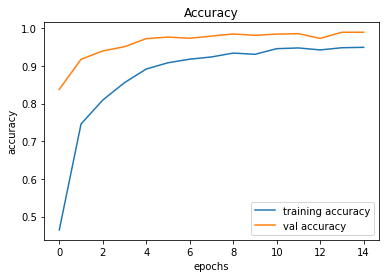

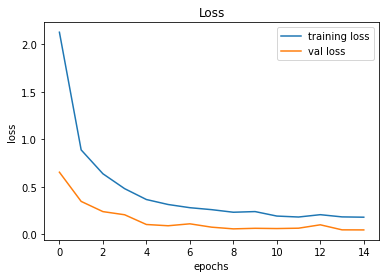

In [8]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
test_data = pd.read_csv("Test.csv")

labels = test_data['ClassId'].values
imgs = test_data['Path'].values

data = []

for img in imgs:
    
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
    
X_test = np.array(data)
pred = model.predict_classes(X_test)

accuracy_score(labels,pred)

0.9566904196357878